# Assignment 2: Linear Regression

<font color=darkblue>
    
In this assignment you will perform linear regression to predict the Boston housing price.

Enter the code along with your comments in each question section.

## Import Libraries & Data Overview

In [166]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn
import statsmodels.api as sm

In [167]:
print(sklearn.datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\fengb\miniconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [168]:
#Load boston housing dataset
boston_housing = datasets.load_boston()
# X = pd.read_excel(f'boston.xlsx')
X = pd.DataFrame(boston_housing['data'], columns = boston_housing['feature_names'])

#"target" is the response variable
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target']

In [169]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



## Exploratory Data Analysis

### Q1.1 Correlation Matrix

Prevent collinearity by removing linearly dependent variables.

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

<AxesSubplot:>

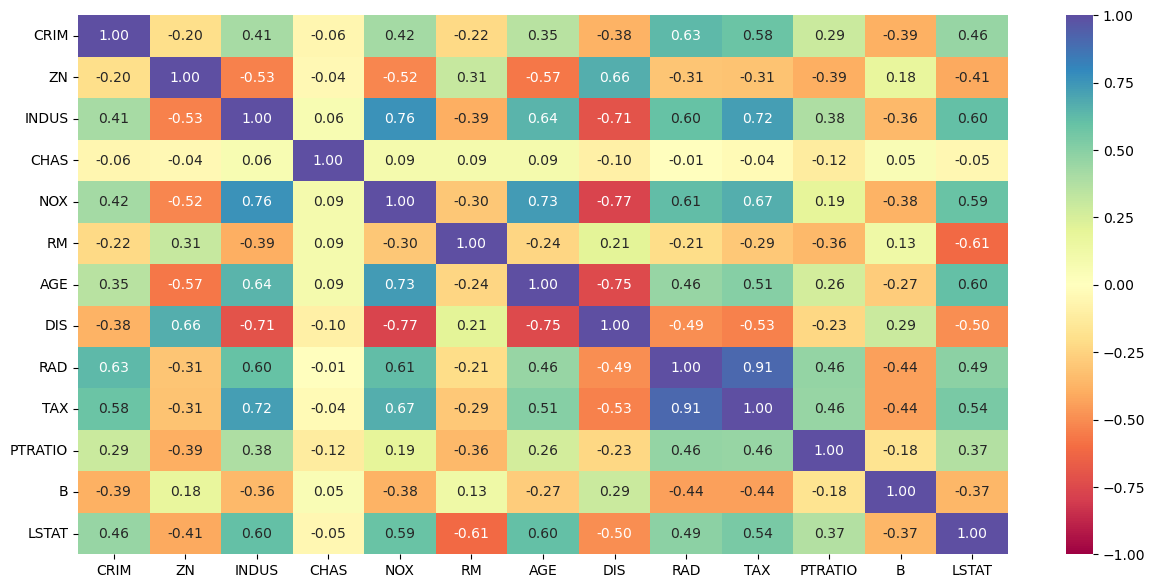

In [170]:
plt.figure(figsize=(15,7))
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

Observing column **RAD - index of accessibility to radial highways** and **TAX - full-value property-tax rate per $10,000** are having extreme correlation coefficient larger than 0.9. Drop one of the column.

In [171]:
corr = abs(X.corr())
abs_mean_corr = corr.mean()
print(abs_mean_corr)

CRIM       0.413421
ZN         0.418941
INDUS      0.551646
CHAS       0.138220
NOX        0.541126
RM         0.335472
AGE        0.497927
DIS        0.509510
RAD        0.509224
TAX        0.539347
PTRATIO    0.361679
B          0.343785
LSTAT      0.507936
dtype: float64


Notice that for col **RAD** and **TAX**, TAX have a higher absolute mean correlation. We drop **TAX** from the dataframe. 

## Data Preparation

### Q2.1 Data Partition

Partition the data into 75% training and 25% validation set.

In [172]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=1)


## Model Building

### Q3.1 Linear Regression Model

If we fit a linear regression model on the training set, what will be the feature weights?

In [173]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(X_train)
# Add constant to test data
x_test1 = sm.add_constant(X_test)

# create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     71.07
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           1.72e-91
Time:                        15:28:49   Log-Likelihood:                -1127.6
No. Observations:                 379   AIC:                             2283.
Df Residuals:                     365   BIC:                             2338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1925      6.005      7.526      0.0

The feature weights is presented by follow:

In [174]:
olsmodel1.params

const      45.192515
CRIM       -0.114429
ZN          0.057130
INDUS       0.038300
CHAS        2.428546
NOX       -21.232624
RM          2.877234
AGE         0.006911
DIS        -1.471583
RAD         0.305784
TAX        -0.010675
PTRATIO    -0.996138
B           0.006277
LSTAT      -0.557414
dtype: float64

### Q3.2 Linear Regression with Two Predictors

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice.

Present the model summary. We call this model **Model 1**.

In [175]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train2 = sm.add_constant(X_train[['AGE', 'RM']])
# Add constant to test data
x_test2 = sm.add_constant(X_test[['AGE', 'RM']])

# create the model
model_1 = sm.OLS(y_train, x_train2).fit()

# get the model summary
model_1.summary()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           7.06e-56
Time:                        15:28:49   Log-Likelihood:                -1238.7
No. Observations:                 379   AIC:                             2483.
Df Residuals:                     376   BIC:                             2495.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.1410      3.465     -5.525      0.0

### Q3.3 Model 1 Performance Evaluation

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance metrics.

Load RMSE & MAE functions

In [176]:
#Load RMSE & MAE functions
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    evl = pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
            }
        )
    print(evl)
    
    return evl

In [177]:
evl = model_pref(model_1, x_train2, x_test2,y_train,y_test)

    Data      RMSE       MAE
0  Train  6.355619  4.025803
1   Test  6.236968  4.692246


### Q3.4 Linear Regression with All Predictors

Now consider all the features (after removing linearly dependent variables).

Fit a linear regression model on the training set with a package at your choice. Present the model summary.

We call this model **Model 2**.

As the heatmap suggested above. 
Column **TAX** is being removed from the dataset.

In [178]:
model_2_X_train = X_train.drop(['TAX'], axis=1)
model_2_X_test= X_test.drop(['TAX'], axis=1)

Check for linearly dependency again

<AxesSubplot:>

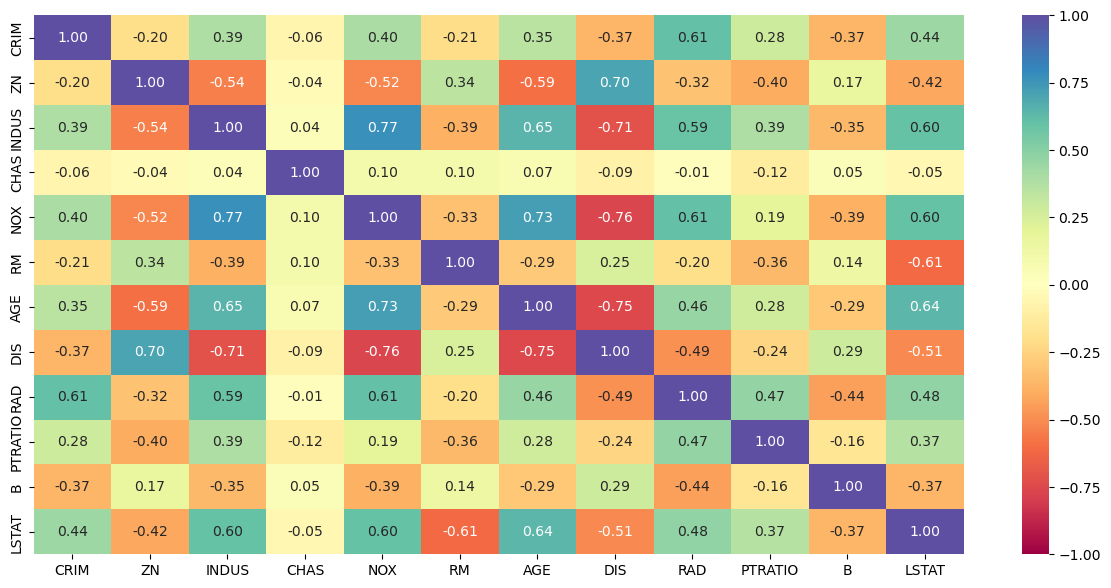

In [179]:
plt.figure(figsize=(15,7))
sns.heatmap(model_2_X_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

No more column with extreme correlation beyond 0.9 or below -0.9.
Green flag, moving forward.

Build model 2

In [180]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train3 = sm.add_constant(X_train.drop(['TAX'], axis=1))
# Add constant to test data
x_test3 = sm.add_constant(X_test.drop(['TAX'], axis=1))

# create the model
model_2 = sm.OLS(y_train, x_train3).fit()

# get the model summary
model_2.summary()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     75.66
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           2.61e-91
Time:                        15:28:51   Log-Likelihood:                -1130.3
No. Observations:                 379   AIC:                             2287.
Df Residuals:                     366   BIC:                             2338.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0783      6.020      7.322      0.0

### Q3.5 Model 2 Performance Evaluation

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance metrics.

In [181]:
evl = model_pref(model_2, x_train3, x_test3,y_train,y_test)

    Data      RMSE       MAE
0  Train  4.775462  3.289529
1   Test  4.789750  3.658603


### Q3.6 Model Performance Comparison

Compare the performance of Model 1 and Model 2.

Visualize the prediction error of both models using histogram.

Comment on the model fitting.

In [182]:
model_1_evl = model_pref(model_1, x_train2, x_test2,y_train,y_test)
model_2_evl = model_pref(model_2, x_train3, x_test3,y_train,y_test)

model_1_evl = model_1_evl.loc[[1]]
model_2_evl = model_2_evl.loc[[1]]

perf = pd.concat([model_1_evl,model_2_evl])
perf['Data'] = ['Model_1_Test','Model_2_Test']

print(perf)

    Data      RMSE       MAE
0  Train  6.355619  4.025803
1   Test  6.236968  4.692246
    Data      RMSE       MAE
0  Train  4.775462  3.289529
1   Test  4.789750  3.658603
           Data      RMSE       MAE
1  Model_1_Test  6.236968  4.692246
1  Model_2_Test  4.789750  3.658603


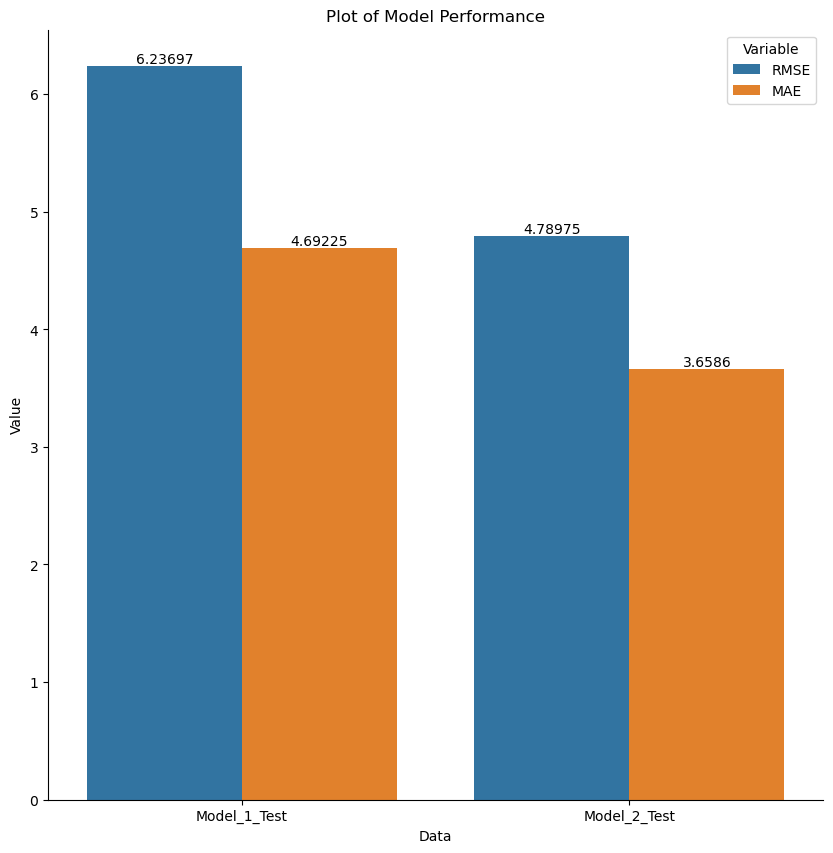

In [183]:
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = perf.melt(id_vars='Data').rename(columns=str.title)
ax = sns.barplot(x='Data', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set(title='Plot of Model Performance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
sns.despine(fig)

Residual Plot for model 1

502   -0.069851
172    7.526796
80    -0.787646
46    -1.715061
318   -0.323187
         ...   
255   -2.658321
72    -3.109421
396   -8.733138
235    2.338980
37    -0.524314
Length: 379, dtype: float64


<AxesSubplot:ylabel='Count'>

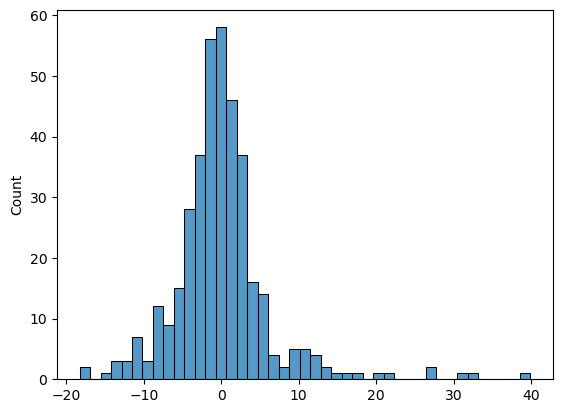

In [184]:
print(model_1.resid)

sns.histplot(model_1.resid)

Residual plot for Model 2

502   -1.300670
172   -0.502276
80    -0.188223
46    -0.222623
318   -0.816925
         ...   
255   -2.533976
72    -2.054149
396   -6.392732
235   -1.025270
37    -1.988095
Length: 379, dtype: float64


<AxesSubplot:ylabel='Count'>

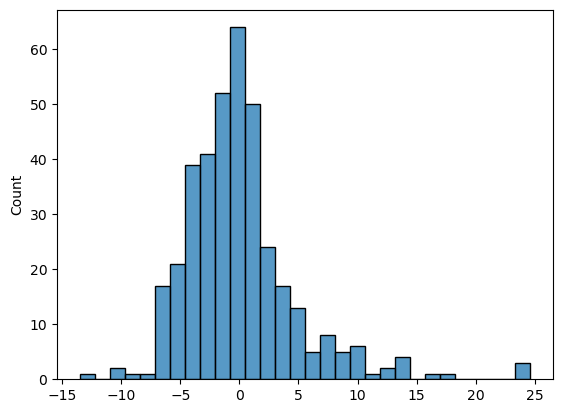

In [185]:
print(model_2.resid)

sns.histplot(model_2.resid)

**Observation:**

- Model 2 have a better variance comparing to Model 1.
- Model 2 have less extreme residual. 
- **Model 2** is a better fit.

### Q3.7 Linear Regression with Ridge Regression

Now consider all the features (after removing linearly dependent variables) to fit a Ridge regression model on the training set with a package at your choice.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [186]:
from sklearn.linear_model import Ridge

rdg = Ridge()



In [187]:
rdg.fit(x_train3, y_train)

rdg_pred = rdg.predict(x_test3)

evl = model_pref(rdg, x_train3, x_test3,y_train,y_test)

    Data      RMSE       MAE
0  Train  4.809492  3.278222
1   Test  4.726708  3.551506


### Q3.8 Model 3 Performance Evaluation

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance metrics.

In [188]:
model_3_evl = model_pref(rdg, x_train3, x_test3,y_train,y_test)
model_3_evl = model_3_evl.loc[[1]]

perf = pd.concat([perf,model_3_evl])
perf['Data'] = ['Model_1_Test','Model_2_Test','Model_3_Test']

print(perf)

    Data      RMSE       MAE
0  Train  4.809492  3.278222
1   Test  4.726708  3.551506
           Data      RMSE       MAE
1  Model_1_Test  6.236968  4.692246
1  Model_2_Test  4.789750  3.658603
1  Model_3_Test  4.726708  3.551506


Bar plot to show the performance

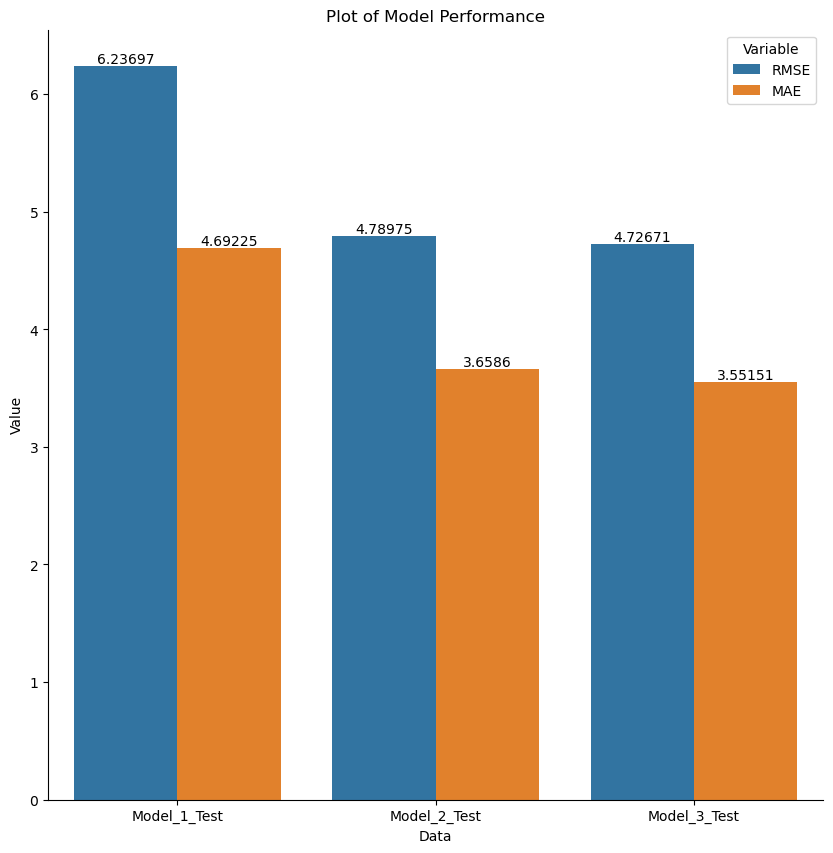

In [189]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = perf.melt(id_vars='Data').rename(columns=str.title)
ax = sns.barplot(x='Data', y='Value', hue='Variable', data=tidy, ax=ax1)
ax.set(title='Plot of Model Performance')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
sns.despine(fig)

[Text(0.5, 1.0, 'Residual for Model 3')]

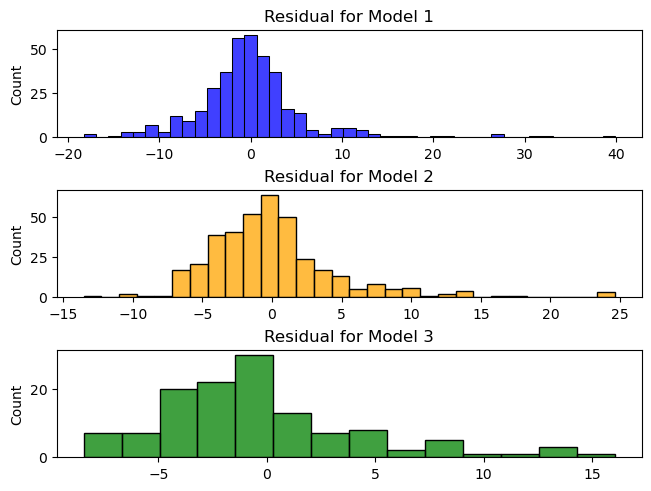

In [190]:
rdg_residuals = y_test - rdg_pred

fig, axs = plt.subplots(nrows=3, constrained_layout=True)
sns.histplot(model_1.resid, ax=axs[0], color = 'blue').set(title='Residual for Model 1')
sns.histplot(model_2.resid, ax=axs[1], color  = 'orange' ).set(title='Residual for Model 2')
sns.histplot(rdg_residuals, ax=axs[2], color = 'green').set(title='Residual for Model 3')

**Observation:**

- Model 1 have great variance and outliers.
- Model 2 have less extreme residual than Model 1. 
- **Model 3** is the best fit.

## Model Selection

### Q4.1 Model Comparison & Selection

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

In [191]:
# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [192]:
model_1_F = model_performance_regression(model_1, x_test2, y_test)
model_2_F = model_performance_regression(model_2, x_test3, y_test)
model_3_F = model_performance_regression(rdg, x_test3, y_test)


models_test_comp_df = pd.concat(
    [
        model_1_F.T,
        model_2_F.T,
        model_3_F.T

    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Feature-Engineered Linear Regression",
    "Feature-Engineered Ridge Regression"
]

print("Test performance comparison:")
print(models_test_comp_df)

Test performance comparison:
                Linear Regression  Feature-Engineered Linear Regression  \
RMSE                     6.236968                              4.789750   
MAE                      4.692246                              3.658603   
R-squared                0.607305                              0.768402   
Adj. R-squared           0.597727                              0.741758   
MAPE                    25.495564                             17.749100   

                Feature-Engineered Ridge Regression  
RMSE                                       4.726708  
MAE                                        3.551506  
R-squared                                  0.774459  
Adj. R-squared                             0.748512  
MAPE                                      17.352008  


**Observation:**

- For 3 error indicator, they measures the average difference between a statistical model's predicted values and the actual values, which means, the close to zero the better.
  - **Linear Regression (Model 1)** is having a relatively large error.
  - **Feature - engineered Linear Regression (Model 2)** have all three error indicators, RMSE, MAE, and MAPE all better than Model 1.
  - **Feature - engineered Ridge Regression (Model 3)** have the best performance in error.


- For two R indications, correlation coefficient, measures the strength and direction of a linear relationship between two continuous variables. R and adj close to 1 are being considered as a good fit.
  - **Linear Regression (Model 1)** is having a lower fit performance.
  - **Feature - engineered Linear Regression (Model 2)** have both R and adj R better than Model 1.
  - **Feature - engineered Ridge Regression (Model 3)** have the R most close to one.


- Linear Regression should not consider overfitting problem. The line with better stats should be picked for the best model fitting.

So I pick:

*Model 3 - Feature-Engineered Ridge Regression*